<a href="https://colab.research.google.com/github/a-brhian/Vibrations/blob/main/01_Gr%C3%A1ficos_no_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Construindo gráficos no Python

In [ ]:
#-------------------------------------------
# INSTITUTO FEDERAL DE EDUCACAO, CIENCIA E TECNOLOGIA DO AMAZONAS
#
# CREATED BY: ALYSSON BRHIAN DE SOUZA MUNIZ SILVA
# DATA: 08/07/2025
# VERSION OF PYTHON: 3.12.11
#
# GOAL: Gráficos de um oscilador harmônico e de um sistema com efeito transiente (subamortecido).
#
#---------------------------------------------

!python --version

Python 3.12.11


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import pandas as pd

#Harmônico Simples

In [ ]:
# Harmônico simples
A_h = 1.0               # amplitude
f_h = 1.0               # frequência em Hz
omega_h = 2 * pi * f_h  # frequência angular
phi_h = pi/6            # fase inicial (rad)

Agora, vamos escrever t de 0 até 5 e dividir em 3000 pontos.

In [ ]:
# Tempo
t_max = 5.0             # duração do gráfico (s)
n_points = 3000
t = np.linspace(0, t_max, n_points)

print(t,len(t))

[0.00000000e+00 1.66722241e-03 3.33444481e-03 ... 4.99666556e+00
 4.99833278e+00 5.00000000e+00] 3000


In [ ]:
# Função Harmônico simples
x_h = A_h * np.cos(omega_h * t + phi_h)

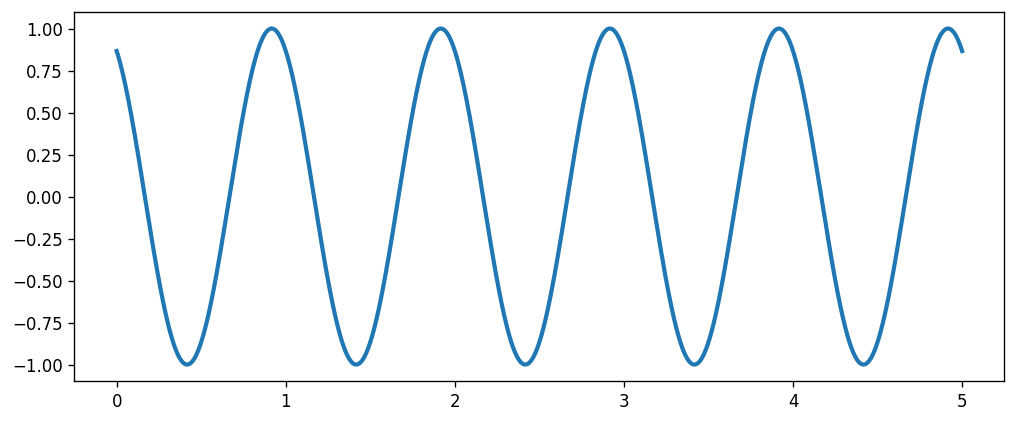

In [ ]:
# ------- Gráfico 1: Oscilação harmônica simples -------
plt.figure(figsize=(10, 4), dpi=120)
plt.plot(t, x_h, linewidth=2.5, linestyle='-', color='tab:blue', label=r'$x(t)=A\cos(\omega t+\phi)$')
plt.show()

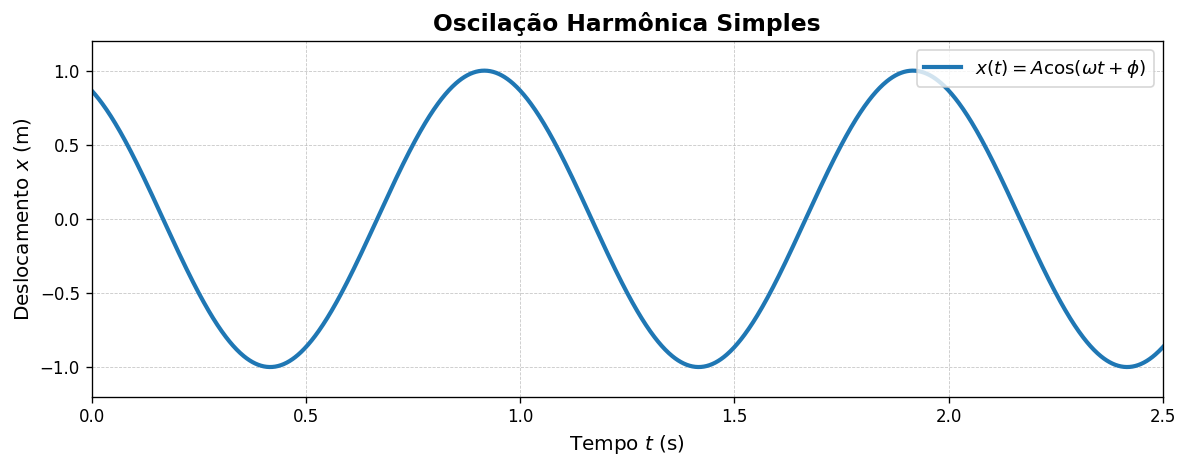

In [ ]:
plt.figure(figsize=(10, 4), dpi=120)
plt.plot(t, x_h, linewidth=2.5, linestyle='-', color='tab:blue', label=r'$x(t)=A\cos(\omega t+\phi)$')
plt.xlabel('Tempo $t$ (s)', fontsize=12)
plt.ylabel('Deslocamento $x$ (m)', fontsize=12)
plt.title('Oscilação Harmônica Simples', fontsize=14, fontweight='bold')
plt.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlim(0, 2.5)  # visualizar poucos ciclos
plt.ylim(-1.2*A_h, 1.2*A_h)
plt.xticks(np.linspace(0, 2.5, 6))
plt.tick_params(axis='both', which='major', labelsize=10)
plt.legend(loc='upper right', fontsize=11)
plt.tight_layout()
plt.show()

#Sistema amortecido

In [ ]:
# Sistema amortecido (subamortecido) - resposta livre (transiente)
A_t = 1.0               # amplitude inicial do transiente
f_n = 2.0               # frequência natural (Hz)
omega_n = 2 * pi * f_n
zeta = 0.08             # coeficiente de amortecimento adimensional (0<zeta<1 subamortecido)
alpha = zeta * omega_n  # taxa de decaimento exponencial
omega_d = omega_n * np.sqrt(max(0.0, 1 - zeta**2))  # frequência amortecida
phi_t = 0.0             # fase do transiente

In [ ]:
# Transiente amortecido (resposta livre)
x_t = A_t * np.exp(-alpha * t) * np.cos(omega_d * t + phi_t)

# velocidade analítica do transiente: v = dx/dt
# x = A e^{-alpha t} cos(omega_d t + phi)
# v = A e^{-alpha t} [ -alpha cos(...) - omega_d sin(...) ]
v_t = A_t * np.exp(-alpha * t) * (-alpha * np.cos(omega_d * t + phi_t) - omega_d * np.sin(omega_d * t + phi_t))

tabela = pd.DataFrame({'t':t, 'x(t)':x_t, 'v(t)':v_t})
print(tabela)

             t      x(t)      v(t)
0     0.000000  1.000000 -1.005310
1     0.001667  0.998108 -1.264542
2     0.003334  0.995784 -1.522354
3     0.005002  0.993032 -1.778635
4     0.006669  0.989854 -2.033279
...        ...       ...       ...
2995  4.993331  0.006339  0.016884
2996  4.994998  0.006366  0.015158
2997  4.996666  0.006390  0.013431
2998  4.998333  0.006411  0.011704
2999  5.000000  0.006429  0.009977

[3000 rows x 3 columns]


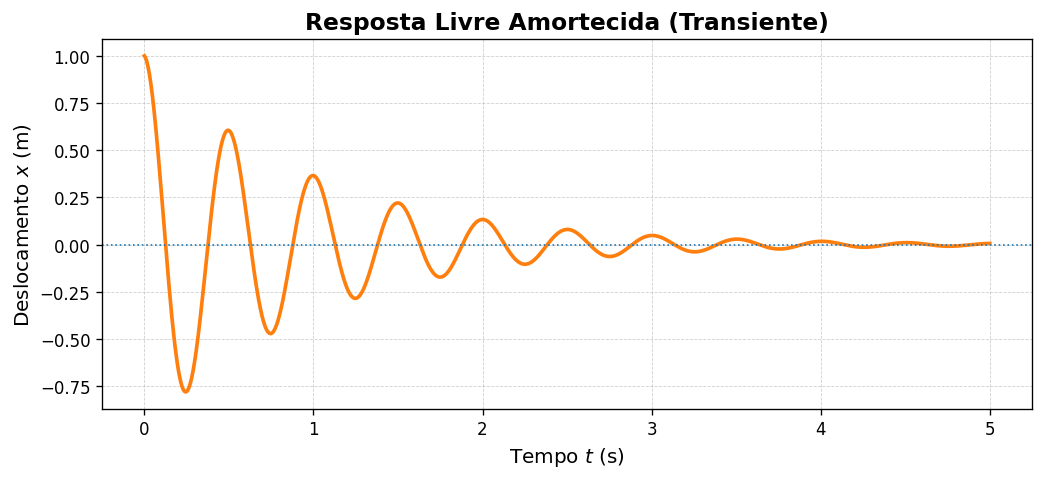

In [ ]:
# ------- Gráfico 2: Resposta livre amortecida (transiente) -------
plt.figure(figsize=(10, 4), dpi=120)
plt.plot(t, x_t, linewidth=2.2, linestyle='-', color='tab:orange', label=r'$x(t)=A e^{-\alpha t}\cos(\omega_d t+\phi)$')
plt.xlabel('Tempo $t$ (s)', fontsize=12)
plt.ylabel('Deslocamento $x$ (m)', fontsize=12)
plt.title('Resposta Livre Amortecida (Transiente)', fontsize=14, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.axhline(0, linestyle=':', linewidth=1.0)  # linha zero
plt.show()

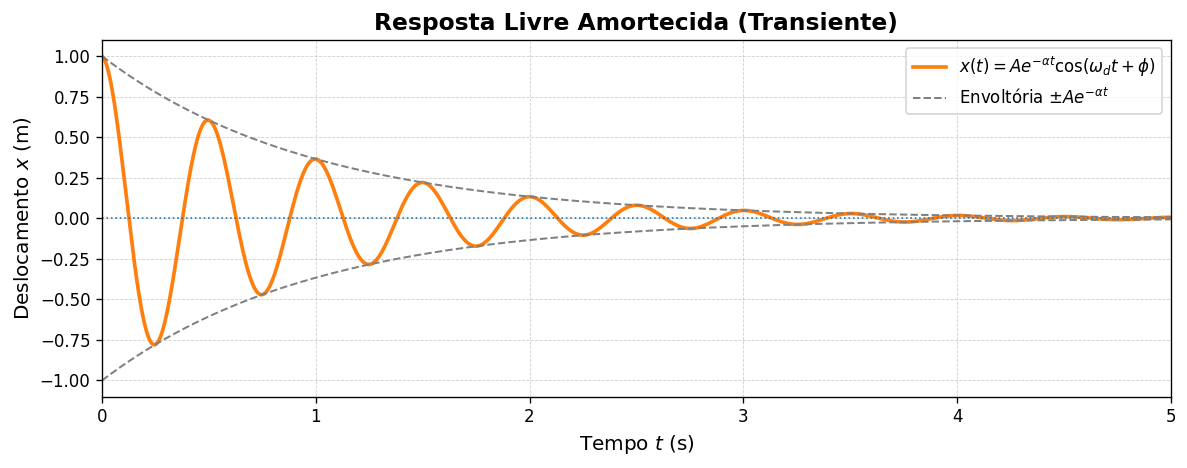

In [ ]:
# ------- Gráfico 2: Resposta livre amortecida (transiente) -------
plt.figure(figsize=(10, 4), dpi=120)
plt.plot(t, x_t, linewidth=2.2, linestyle='-', color='tab:orange', label=r'$x(t)=A e^{-\alpha t}\cos(\omega_d t+\phi)$')
plt.xlabel('Tempo $t$ (s)', fontsize=12)
plt.ylabel('Deslocamento $x$ (m)', fontsize=12)
plt.title('Resposta Livre Amortecida (Transiente)', fontsize=14, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.6)
plt.axhline(0, linestyle=':', linewidth=1.0)  # linha zero
# envelope (±A e^{-alpha t})
envelope = A_t * np.exp(-alpha * t)
plt.plot(t, envelope, linewidth=1.2, linestyle='--', color='gray', label='Envoltória $\\pm A e^{-\\alpha t}$')
plt.plot(t, -envelope, linewidth=1.2, linestyle='--', color='gray')
plt.xlim(0, t_max)
plt.ylim(-1.1*A_t, 1.1*A_t)
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()

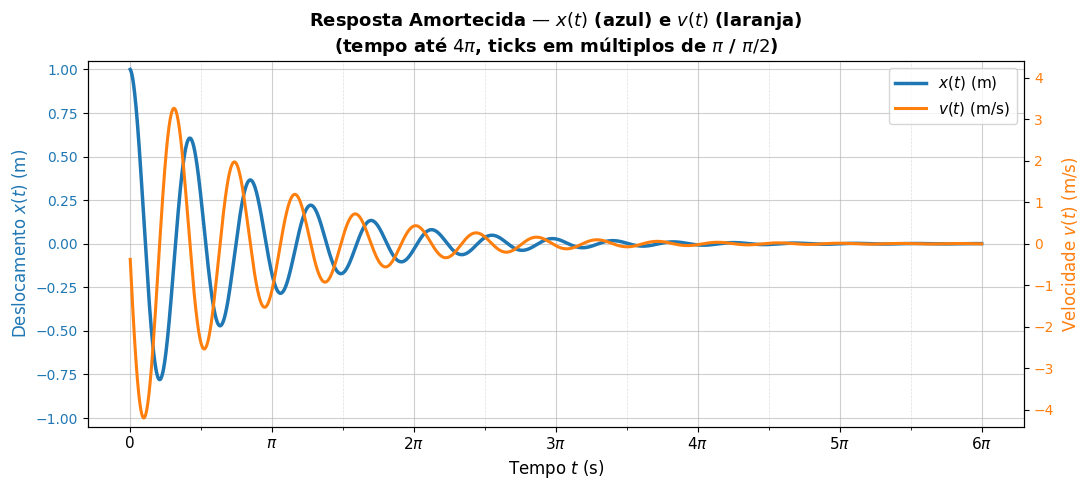

In [ ]:
# --------- Preparar ticks nos múltiplos de pi/2 (mostramos rótulos em termos de pi) ----------
# ticks a cada pi/2
xticks = np.arange(0, t_max + 1e-9, np.pi/2)

def pi_label(x):
    # recebe número real x (em radianos) e devolve label em termos de pi (LaTeX)
    num = int(round(x / (np.pi/2)))
    if num == 0:
        return '0'
    sign = '-' if num < 0 else ''
    n = abs(num)
    if n % 2 == 0:
        m = n // 2
        if m == 1:
            return sign + r'$\pi$'
        else:
            return sign + f'${m}\\pi$'
    else:
        if n == 1:
            return sign + r'$\tfrac{\pi}{2}$'
        else:
            return sign + f'$\\frac{{{n}\\pi}}{{2}}$'

xtick_labels = [pi_label(x) for x in xticks]

# --------- Limites simétricos para que o zero de ambos os eixos coincida ----------
ylim_x = 1.05 * np.max(np.abs(x_t))
ylim_v = 1.05 * np.max(np.abs(v_t))
ax_ylim = (-ylim_x, ylim_x)     # eixo y (x_t) simétrico
ax2_ylim = (-ylim_v, ylim_v)    # eixo y2 (v_t) simétrico -> zero ficará na mesma linha horizontal

# --------- Plot principal (x_t) ----------
fig, ax = plt.subplots(figsize=(11,5))
ln1, = ax.plot(t, x_t, linewidth=2.5, linestyle='-', color='tab:blue', label=r'$x(t)$ (m)')

ax.set_xlabel('Tempo $t$ (s)', fontsize=12)
ax.set_ylabel('Deslocamento $x(t)$ (m)', fontsize=12, color='tab:blue')
ax.tick_params(axis='y', labelcolor='tab:blue', labelsize=10)
ax.set_ylim(ax_ylim)

# ticks de tempo e labels em pi
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels, fontsize=11)
# marque major ticks em pi e minor em pi/2 para grades diferentes
ax.set_xticks(np.arange(0, t_max+1e-9, np.pi), minor=False)
ax.set_xticks(np.arange(0, t_max+1e-9, np.pi/2), minor=True)

# grid: major para pi (linha mais forte), minor para pi/2 (mais leve)
ax.grid(which='major', linestyle='-', linewidth=0.8, alpha=0.6)
ax.grid(which='minor', linestyle='--', linewidth=0.5, alpha=0.4)

# --------- Eixo direito para v_t ----------
ax2 = ax.twinx()
ln2, = ax2.plot(t, v_t, linewidth=2.2, linestyle='-', color='tab:orange', label=r'$v(t)$ (m/s)')
ax2.set_ylabel('Velocidade $v(t)$ (m/s)', fontsize=12, color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange', labelsize=10)
ax2.set_ylim(ax2_ylim)   # simétrico para alinhar zero com ax

# --------- Legenda combinada ----------
lines = [ln1, ln2]
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc='upper right', fontsize=11)

# --------- Visual e ajustes finais ----------
ax.set_title('Resposta Amortecida — $x(t)$ (azul) e $v(t)$ (laranja)\n(tempo até $4\\pi$, ticks em múltiplos de $\\pi$ / $\\pi/2$)', fontsize=13, fontweight='bold')
plt.tight_layout()

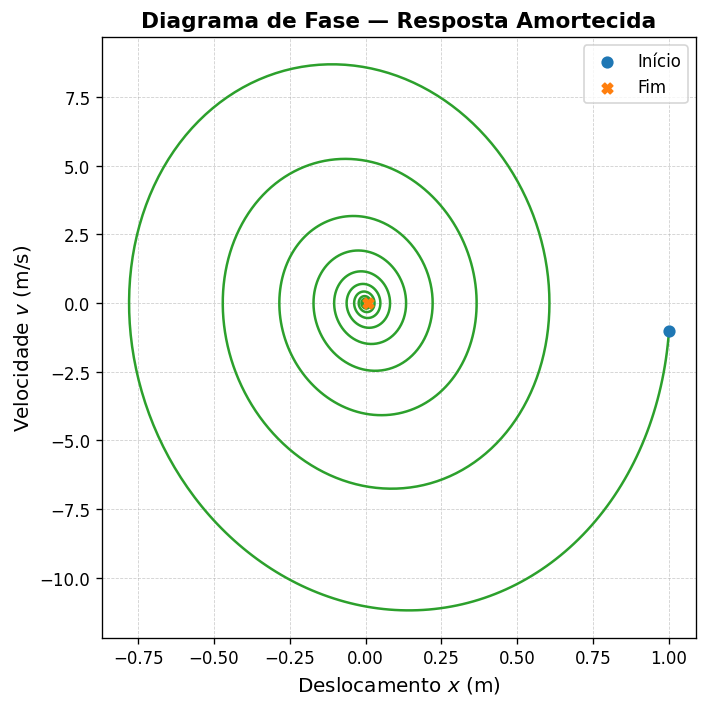

In [ ]:
# ------- Gráfico 3: Diagrama de fase (x vs v) -------
plt.figure(figsize=(6, 6), dpi=120)
plt.plot(x_t, v_t, linewidth=1.5, linestyle='-', color='tab:green')
plt.xlabel('Deslocamento $x$ (m)', fontsize=12)
plt.ylabel('Velocidade $v$ (m/s)', fontsize=12)
plt.title('Diagrama de Fase — Resposta Amortecida', fontsize=13, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
# marcar início e fim
plt.scatter([x_t[0]], [v_t[0]], s=40, marker='o', label='Início', zorder=5)
plt.scatter([x_t[-1]], [v_t[-1]], s=40, marker='X', label='Fim', zorder=5)
plt.legend()
plt.tight_layout()
#plt.savefig('/mnt/data/diagrama_fase.png', dpi=200)
plt.show()